In [10]:
import pandas as pd
import os, math
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def load_dataset(path,file):
    csv_path = os.path.join(path,file)
    return pd.read_csv(csv_path)

In [12]:
PATH = "../Fraude en TC/"
DATASET = "fraude_tc.csv"

In [13]:
df  = load_dataset(PATH,DATASET)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [21]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Proporcion de fraude segun si es operacion online o no

In [24]:
df.groupby('online_order').sum()['fraud']/df['online_order'].value_counts()

0.0    0.013427
1.0    0.127140
dtype: float64

In [28]:
col = 'repeat_retailer'
for col in df.columns:
    if col != 'fraud':
        print(col,'\n')
        print(df.groupby(col).sum()['fraud']/df[col].value_counts())
        print()

distance_from_home 

0.004874        0.0
0.021322        0.0
0.022599        0.0
0.024144        0.0
0.024461        0.0
               ... 
4601.011222     0.0
4823.638452     0.0
5797.972589     0.0
8777.136420     0.0
10632.723672    1.0
Length: 1000000, dtype: float64

distance_from_last_transaction 

0.000118        0.0
0.000298        0.0
0.000319        0.0
0.000338        0.0
0.000342        0.0
               ... 
2724.273459     0.0
2938.197853     0.0
3437.278746     0.0
4968.315477     0.0
11851.104565    0.0
Length: 1000000, dtype: float64

ratio_to_median_purchase_price 

0.004399      0.0
0.005741      0.0
0.006125      0.0
0.007278      0.0
0.007370      0.0
             ... 
126.713701    1.0
146.213898    1.0
168.137909    0.0
266.689692    1.0
267.802942    0.0
Length: 1000000, dtype: float64

repeat_retailer 

0.0    0.088449
1.0    0.087262
dtype: float64

used_chip 

used_chip
0.0    0.100051
1.0    0.063956
dtype: float64

used_pin_number 

used_pin_number
0.0   

### Fraud

In [15]:
df['fraud'].value_counts()/len(df['fraud'])

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Tenemos datos no balanceados: casi todas las transacciones no son fraude (91%)

<AxesSubplot:>

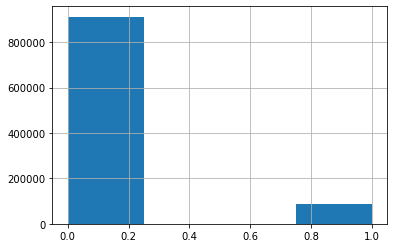

In [ ]:
df['fraud'].hist()

### Distance from home and Distance from last transaction

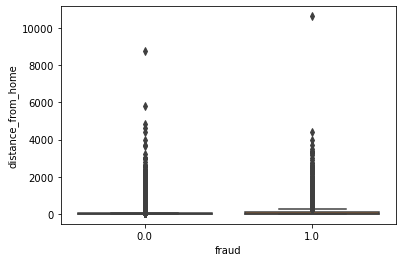

In [20]:
ax = sns.boxplot(x="fraud", y="distance_from_home", data=df)


In [ ]:
df['distance_from_home'].describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

In [ ]:
df['distance_from_last_transaction'].describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>

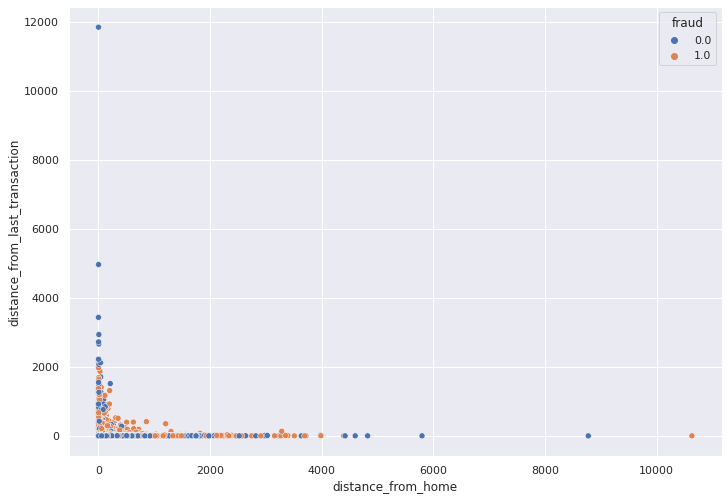

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x="distance_from_home", y="distance_from_last_transaction", hue="fraud")

### Ratio to median purchase

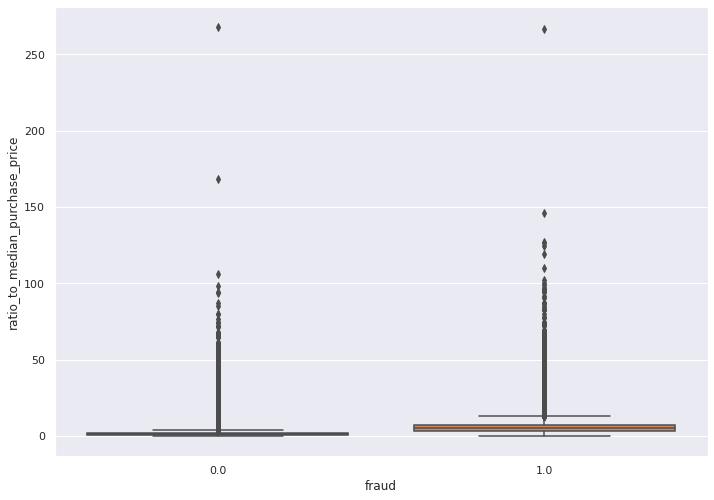

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data = df, y="ratio_to_median_purchase_price", x="fraud")

In [ ]:
df['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

In [ ]:
df['ratio_purchase_exp'] = df['ratio_to_median_purchase_price'].apply(lambda x: math.exp(x))

<AxesSubplot:>

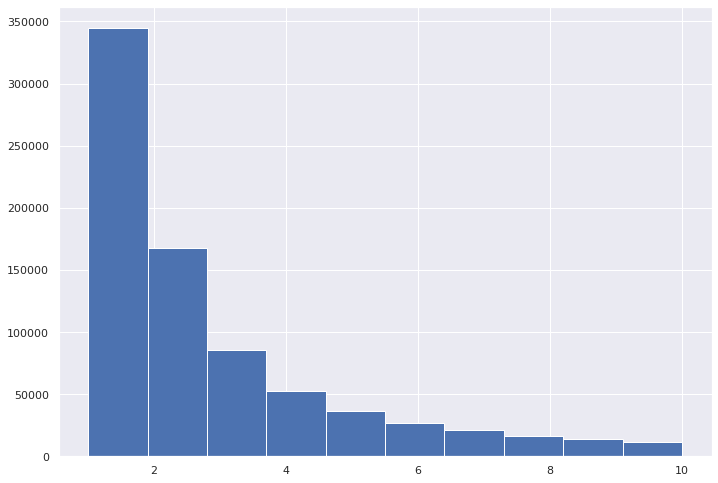

In [ ]:
mask = (df['ratio_purchase_exp']<10)

df[mask]['ratio_purchase_exp'].hist()

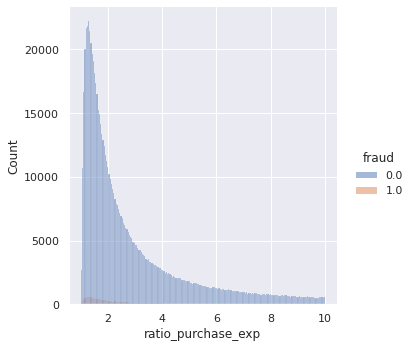

In [ ]:
ax = sns.displot(df[mask], x="ratio_purchase_exp", hue="fraud")

In [ ]:
ax = sns.displot(df, x="ratio_purchase_exp")

In [ ]:
df = df.drop(columns = ['ratio_purchase_exp'])

Correlación

In [ ]:
df.drop(columns = ['fraud']).corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000
